In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# import dataset
df = pd.read_csv('../Without Feature Selection/UFC_clustering.csv')
df.head()

,R_fighter,B_fighter,location,weight_class,B_Stance,R_Stance,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
0,Jorge Masvidal,Al Iaquinta,"Fairfax, Virginia, USA",5,Orthodox,Orthodox,Blue,0.768371,0.000000,0.332278,...,1.609438,0.000000,0.693147,0.000000,5.817944,5.832938,5.655992,3.871201,3.912023,1
1,Josh Koscheck,Johny Hendricks,"East Rutherford, New Jersey, USA",6,Southpaw,Orthodox,Blue,0.527867,0.000000,0.578499,...,1.791759,1.945910,1.386294,0.000000,5.810362,5.825469,5.655992,3.891820,3.988984,1
2,John Dodson,Manvel Gamburyan,"Tampa, Florida, USA",3,Orthodox,Orthodox,Red,0.405465,0.236337,0.323143,...,1.098612,1.386294,0.000000,0.693147,5.755616,5.771566,5.525453,4.007333,3.931826,1
3,Tony Ferguson,Katsunori Kikuno,"Las Vegas, Nevada, USA",5,Orthodox,Orthodox,Red,0.000000,0.000000,0.385262,...,0.693147,0.693147,0.693147,0.693147,5.817944,5.847710,5.602119,3.970292,3.912023,1
4,Richard Walsh,Viscardi Andrade,"Brisbane, Queensland, Australia",6,Orthodox,Orthodox,Blue,0.405465,0.000000,0.378436,...,1.098612,0.000000,0.000000,0.000000,5.825469,5.825469,5.655992,3.970292,3.850148,1


In [3]:
features_to_keep = ["B_fighter", "R_fighter", "B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed", "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed"]

df_cluster2 = df[features_to_keep]

df_cluster2.head()

,B_fighter,R_fighter,B_avg_HEAD_landed,B_avg_BODY_landed,B_avg_LEG_landed,B_avg_DISTANCE_landed,R_avg_HEAD_landed,R_avg_BODY_landed,R_avg_LEG_landed,R_avg_DISTANCE_landed
0,Al Iaquinta,Jorge Masvidal,3.713000,2.170838,1.870600,3.867287,3.657937,2.916080,1.842532,3.750974
1,Johny Hendricks,Josh Koscheck,2.549811,1.713235,1.298573,2.290006,3.029900,2.114959,0.144418,2.766444
2,Manvel Gamburyan,John Dodson,2.978172,1.864489,1.928921,3.068110,2.822123,3.000798,2.392197,3.537557
3,Katsunori Kikuno,Tony Ferguson,2.833213,1.791759,1.098612,2.890372,2.744864,1.490091,2.031432,3.164947
4,Viscardi Andrade,Richard Walsh,3.277145,2.772589,2.140066,3.496508,3.710519,2.474435,2.740840,3.544576


In [4]:
df_cluster2 = df_cluster2.drop_duplicates(subset=['B_fighter', 'R_fighter'])

# B_fighter df
df_B_fighter = df_cluster2[['B_fighter', "B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed"]]

# Rename all columns to remove the 'B_' prefix
df_B_fighter.columns = df_B_fighter.columns.str.replace('B_', '')

# R_fighter df
df_R_fighter = df_cluster2[['R_fighter', "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed"]]

# Rename all columns to remove the 'R_' prefix
df_R_fighter.columns = df_R_fighter.columns.str.replace('R_', '')

# Combine the two DFs
df_fighter = pd.concat([df_B_fighter, df_R_fighter])

df_fighter.head()


,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed
0,Al Iaquinta,3.713000,2.170838,1.870600,3.867287
1,Johny Hendricks,2.549811,1.713235,1.298573,2.290006
2,Manvel Gamburyan,2.978172,1.864489,1.928921,3.068110
3,Katsunori Kikuno,2.833213,1.791759,1.098612,2.890372
4,Viscardi Andrade,3.277145,2.772589,2.140066,3.496508


In [5]:
df_fighter.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_HEAD_landed,6042.0,3.028816,0.686783,0.0,2.639057,3.091042,3.491999,5.159996
avg_BODY_landed,6042.0,1.901501,0.733193,0.0,1.430061,1.948140,2.416257,4.174387
avg_LEG_landed,6042.0,1.632680,0.812175,0.0,1.098612,1.681759,2.221994,4.148700
avg_DISTANCE_landed,6042.0,3.028777,0.816072,0.0,2.545531,3.113515,3.626006,5.266045


In [7]:
print("Shape before dropping duplicates: ", df_fighter.shape)
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)
print("Shape after dropping duplicates: ", df_fighter.shape)

Shape before dropping duplicates:  (6042, 5)
Shape after dropping duplicates:  (1251, 5)


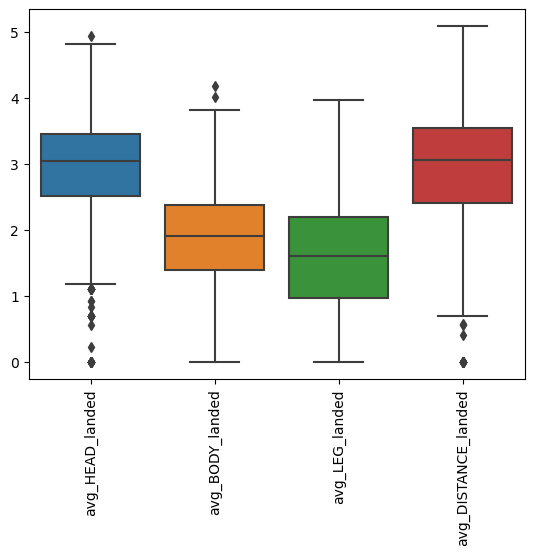

In [8]:
# Check outliers
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()


In [9]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [10]:
outliers = dict(check_outlier(df_fighter[1:]).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/df_fighter[1:][key].shape[0] * 100}%")

Outlier pada tiap atribut:
avg_BODY_landed         2
avg_DISTANCE_landed    19
avg_HEAD_landed        50
avg_LEG_landed          0
fighter                 0
dtype: int64


percentage of outliers in each column:
avg_BODY_landed = 0.16%
avg_DISTANCE_landed = 1.52%
avg_HEAD_landed = 4.0%
avg_LEG_landed = 0.0%
fighter = 0.0%


/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_16132/3859787923.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [11]:
# Drop outliers in x y z columns
def drop_outliers(df, column_name):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered

In [12]:
columns_to_drop_outliers = ['avg_HEAD_landed', 'avg_BODY_landed', 'avg_LEG_landed', 'avg_DISTANCE_landed']

for c in columns_to_drop_outliers:
    df_fighter = drop_outliers(df_fighter, c)

df_fighter.shape

(1190, 5)

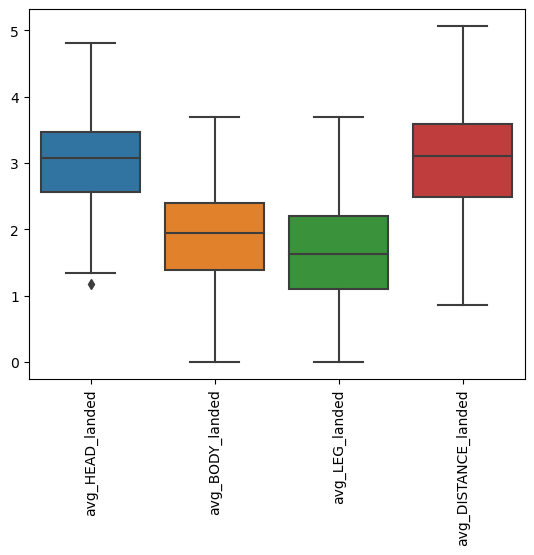

In [13]:
# Boxplot
sns.boxplot(data=df_fighter)
plt.xticks(rotation=90)
plt.show()

In [14]:
# Filter avg_HEAD_landed to > 1.2
df_fighter = df_fighter[df_fighter['avg_HEAD_landed'] > 1.2]

In [15]:
df_fighter.head()

,fighter,avg_HEAD_landed,avg_BODY_landed,avg_LEG_landed,avg_DISTANCE_landed
0,Al Iaquinta,3.713000,2.170838,1.870600,3.867287
1,Johny Hendricks,2.549811,1.713235,1.298573,2.290006
2,Manvel Gamburyan,2.978172,1.864489,1.928921,3.068110
3,Katsunori Kikuno,2.833213,1.791759,1.098612,2.890372
4,Viscardi Andrade,3.277145,2.772589,2.140066,3.496508


In [16]:
# Drop duplicates
df_fighter.drop_duplicates(subset=['fighter'], inplace=True)

In [17]:
# Reindex
df_fighter.reset_index(drop=True, inplace=True)

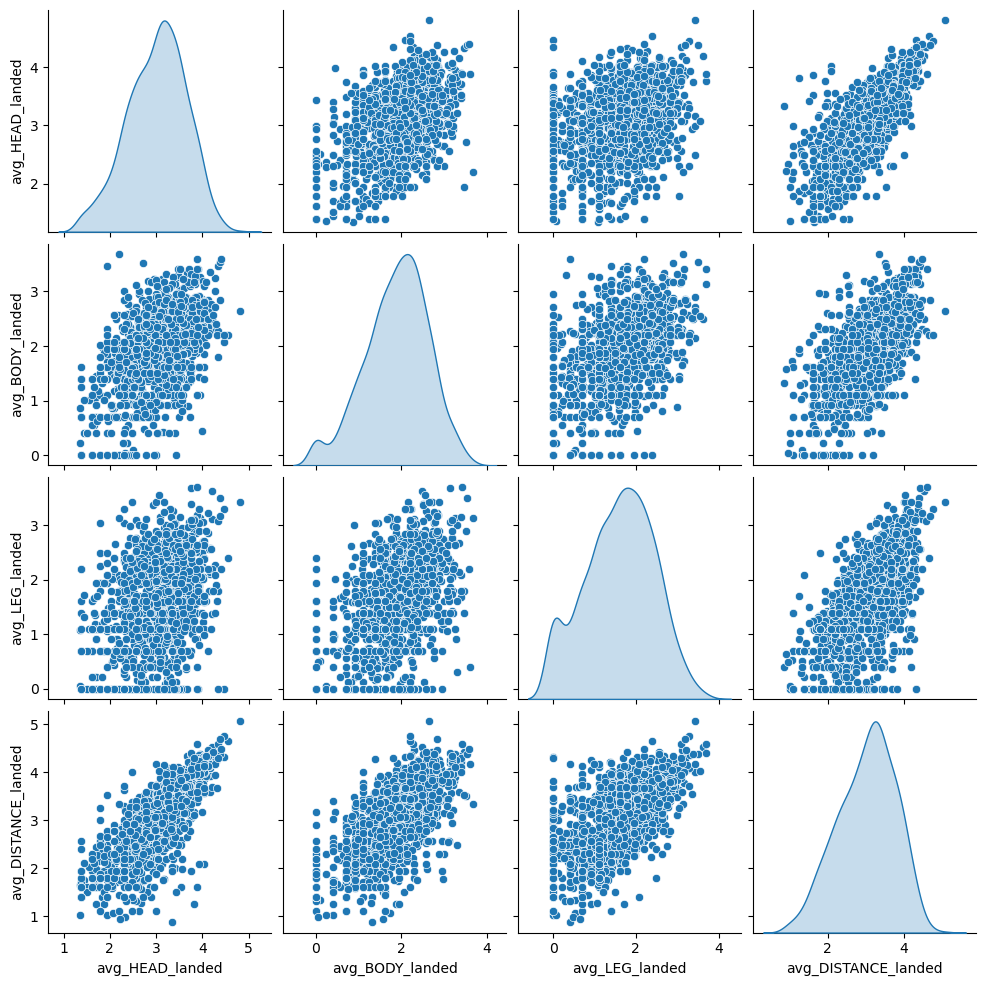

In [18]:
#Pairplot
sns.pairplot(df_fighter, diag_kind='kde')
plt.show()

In [19]:
# Standardize features
scaler = StandardScaler()
df_fighter_scaled = df_fighter.drop(columns=['fighter'])
df_fighter_scaled = scaler.fit_transform(df_fighter_scaled)

# Combine with fighter column
df_fighter_scaled = pd.DataFrame(df_fighter_scaled, columns=df_fighter.drop(columns=['fighter']).columns)


In [21]:
from sklearn.decomposition import PCA

# PCA to two components
pca = PCA(n_components=2)
df_fighter_pca = pca.fit_transform(df_fighter_scaled)

# Create a new dataframe with the PCA scores
df_fighter_pca = pd.DataFrame(df_fighter_pca, columns=['PC1', 'PC2'])

df_fighter_pca.head()

,PC1,PC2
0,-1.534032,0.539254
1,1.184112,-0.268404
2,-0.178881,-0.335010
3,0.560332,0.277717
4,-1.460183,-0.231180


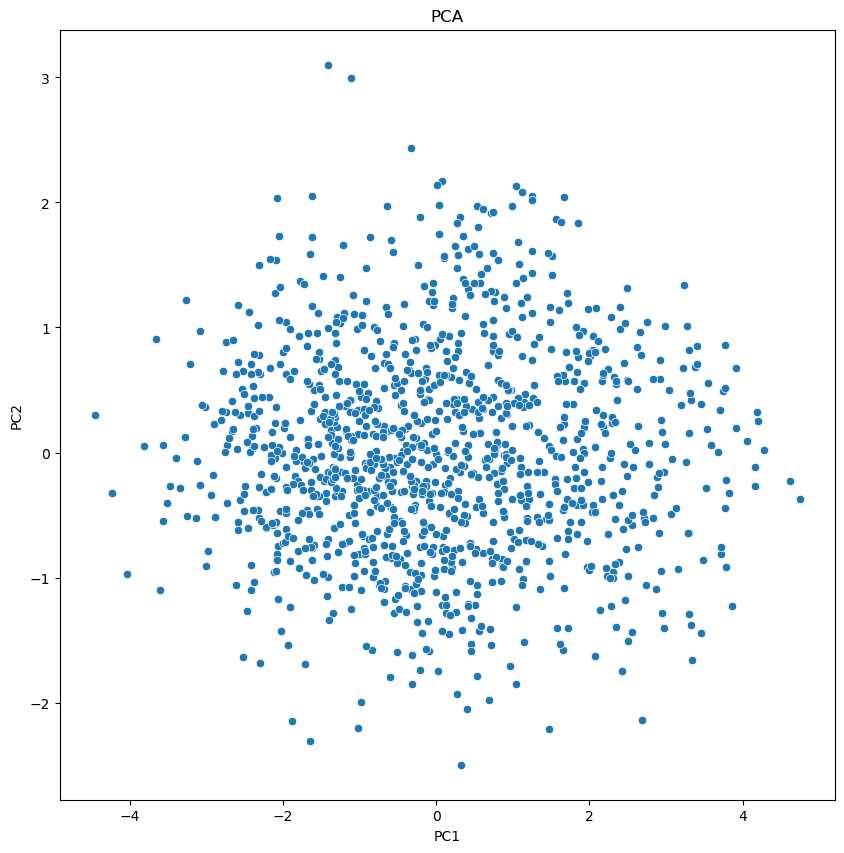

In [22]:
# Plot PCA
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2')
plt.title("PCA")
plt.show()

Dari plot ini, distinguishable clusters belum terlalu kelihatan. Mengutip dari https://towardsdatascience.com/when-clustering-doesnt-make-sense-c6ed9a89e9e6, data yang membentuk central grouping yang dense seperti plot di atas, clustering mungkin tidak cocok untuk dilakukan. Untuk sekarang, kita coba lakukan clustering dan k-means dan akan diselidiki apakah data ini benar-benar tidak cocok untuk dilakukan clustering.

In [23]:
# Import KMeans
from sklearn.cluster import KMeans

clustering_scores = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_fighter_scaled)
    clustering_scores.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.


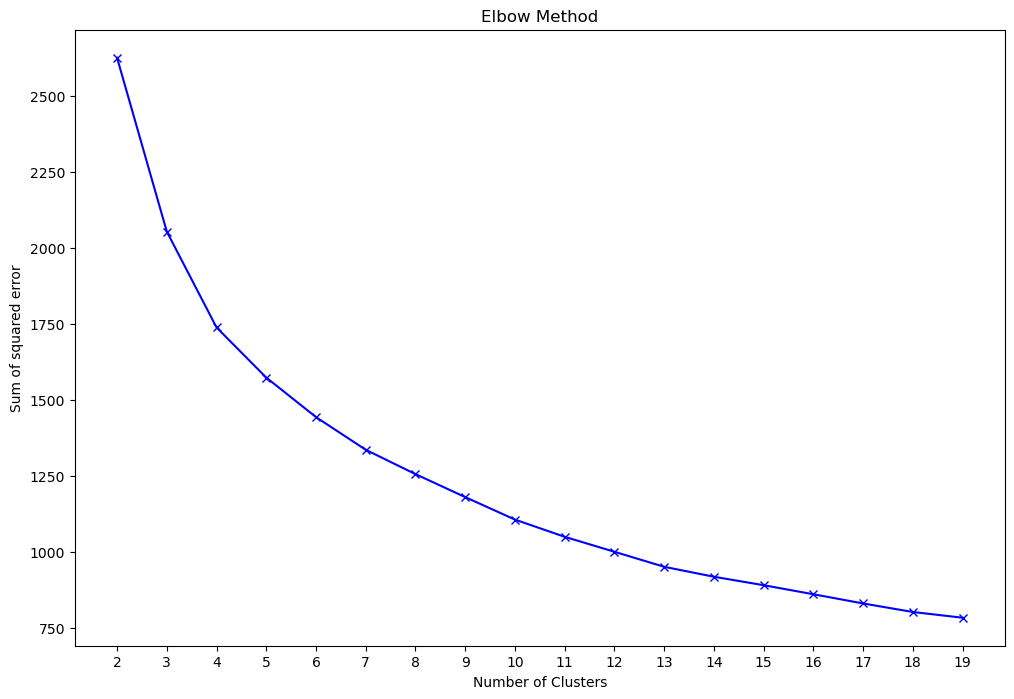

In [24]:
# Plotting SSE Plot to use Elbow Method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 20), clustering_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method')
plt.xticks(range(2, 20))
plt.show()

Dari plot, point of elbow tidak terlalu kelihatan. Gunakan Silhouette score sebagai dasar penentuan K

For n_clusters = 2 The average silhouette_coefficient is : 0.36987950519208024
For n_clusters = 3 The average silhouette_coefficient is : 0.2781750900395552
For n_clusters = 4 The average silhouette_coefficient is : 0.27667842728067293
For n_clusters = 5 The average silhouette_coefficient is : 0.23083369690487726
For n_clusters = 6 The average silhouette_coefficient is : 0.22256380383916438
For n_clusters = 7 The average silhouette_coefficient is : 0.217055740096575
For n_clusters = 8 The average silhouette_coefficient is : 0.21073090356365362
For n_clusters = 9 The average silhouette_coefficient is : 0.20979380076905754
For n_clusters = 10 The average silhouette_coefficient is : 0.2090075996597436
For n_clusters = 11 The average silhouette_coefficient is : 0.2079733923511713
For n_clusters = 12 The average silhouette_coefficient is : 0.20957692694811858
For n_clusters = 13 The average silhouette_coefficient is : 0.21199930466256897
For n_clusters = 14 The average silhouette_coefficien

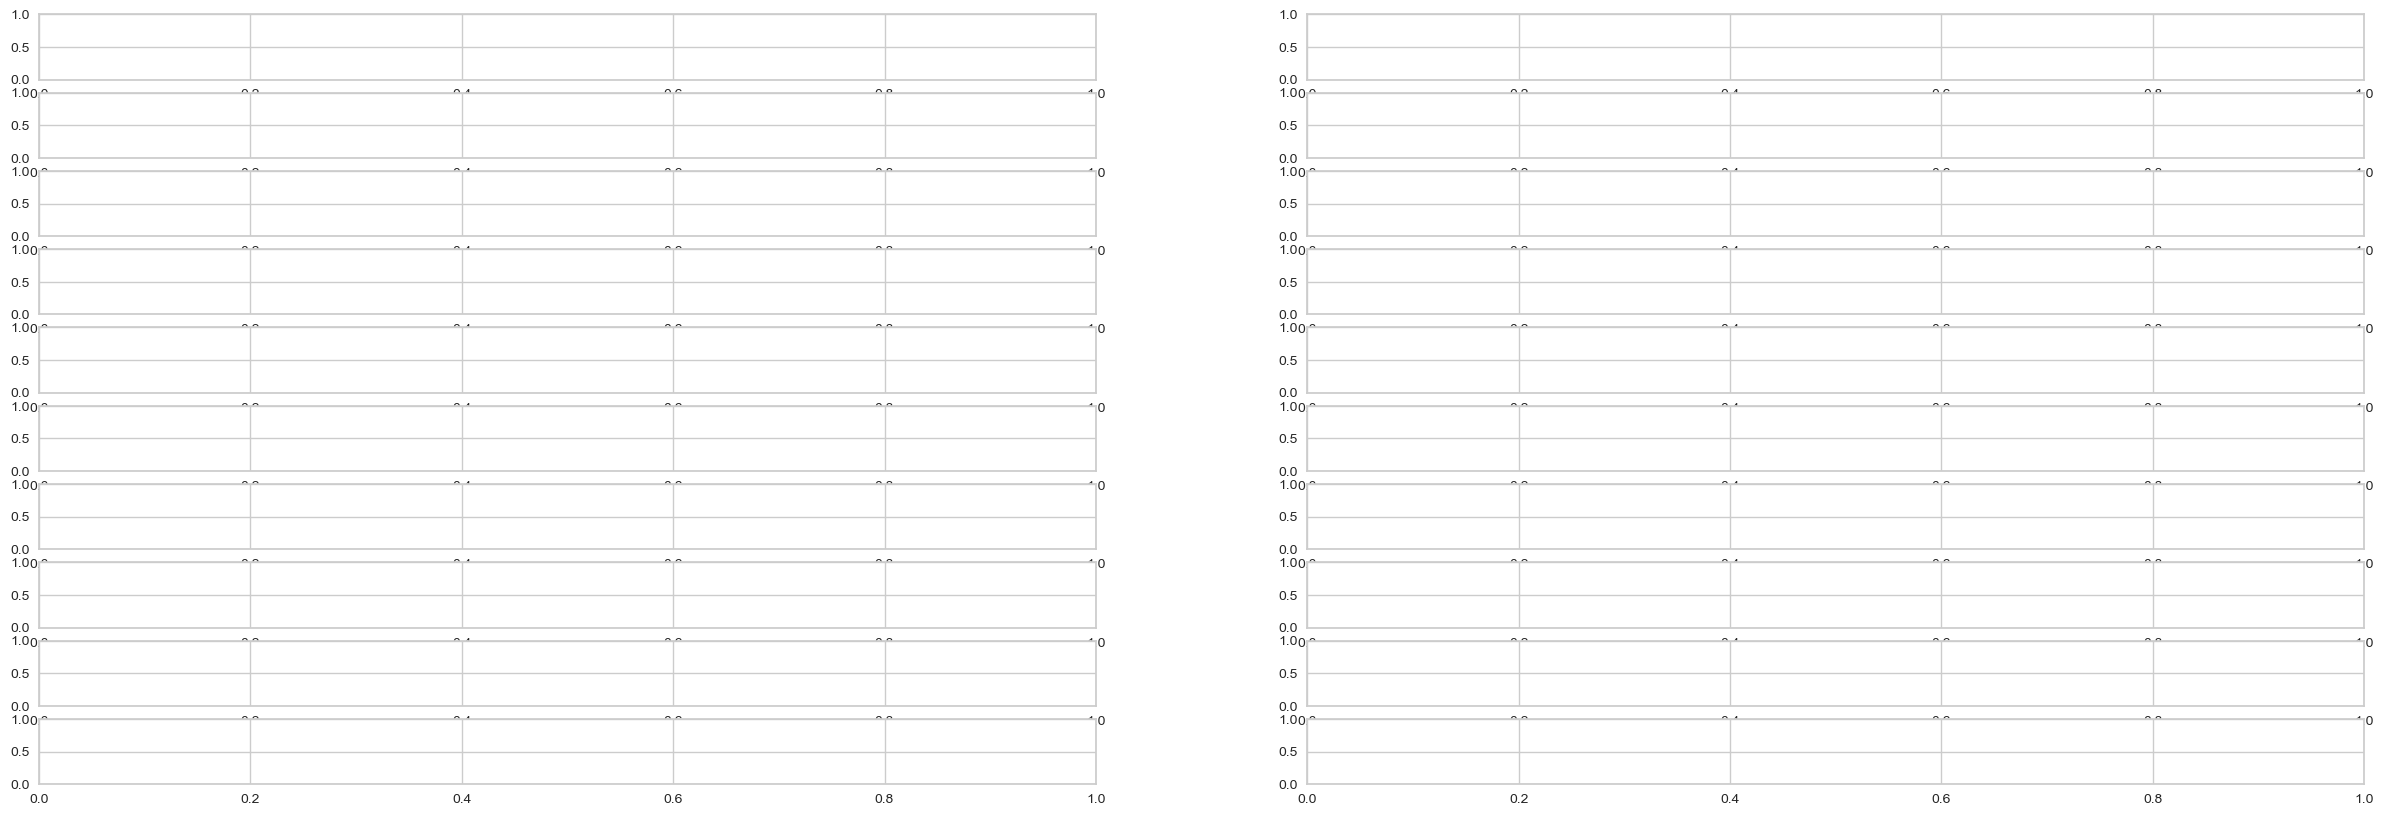

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

num_of_cluster = [i for i in range(2, 20)]

silhouette_avg_list = []

for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10, random_state=42)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(df_fighter_scaled)
    silhouette_avg = silhouette_score(df_fighter_scaled, cluster_labels)
    silhouette_avg_list.append((k, silhouette_avg))
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

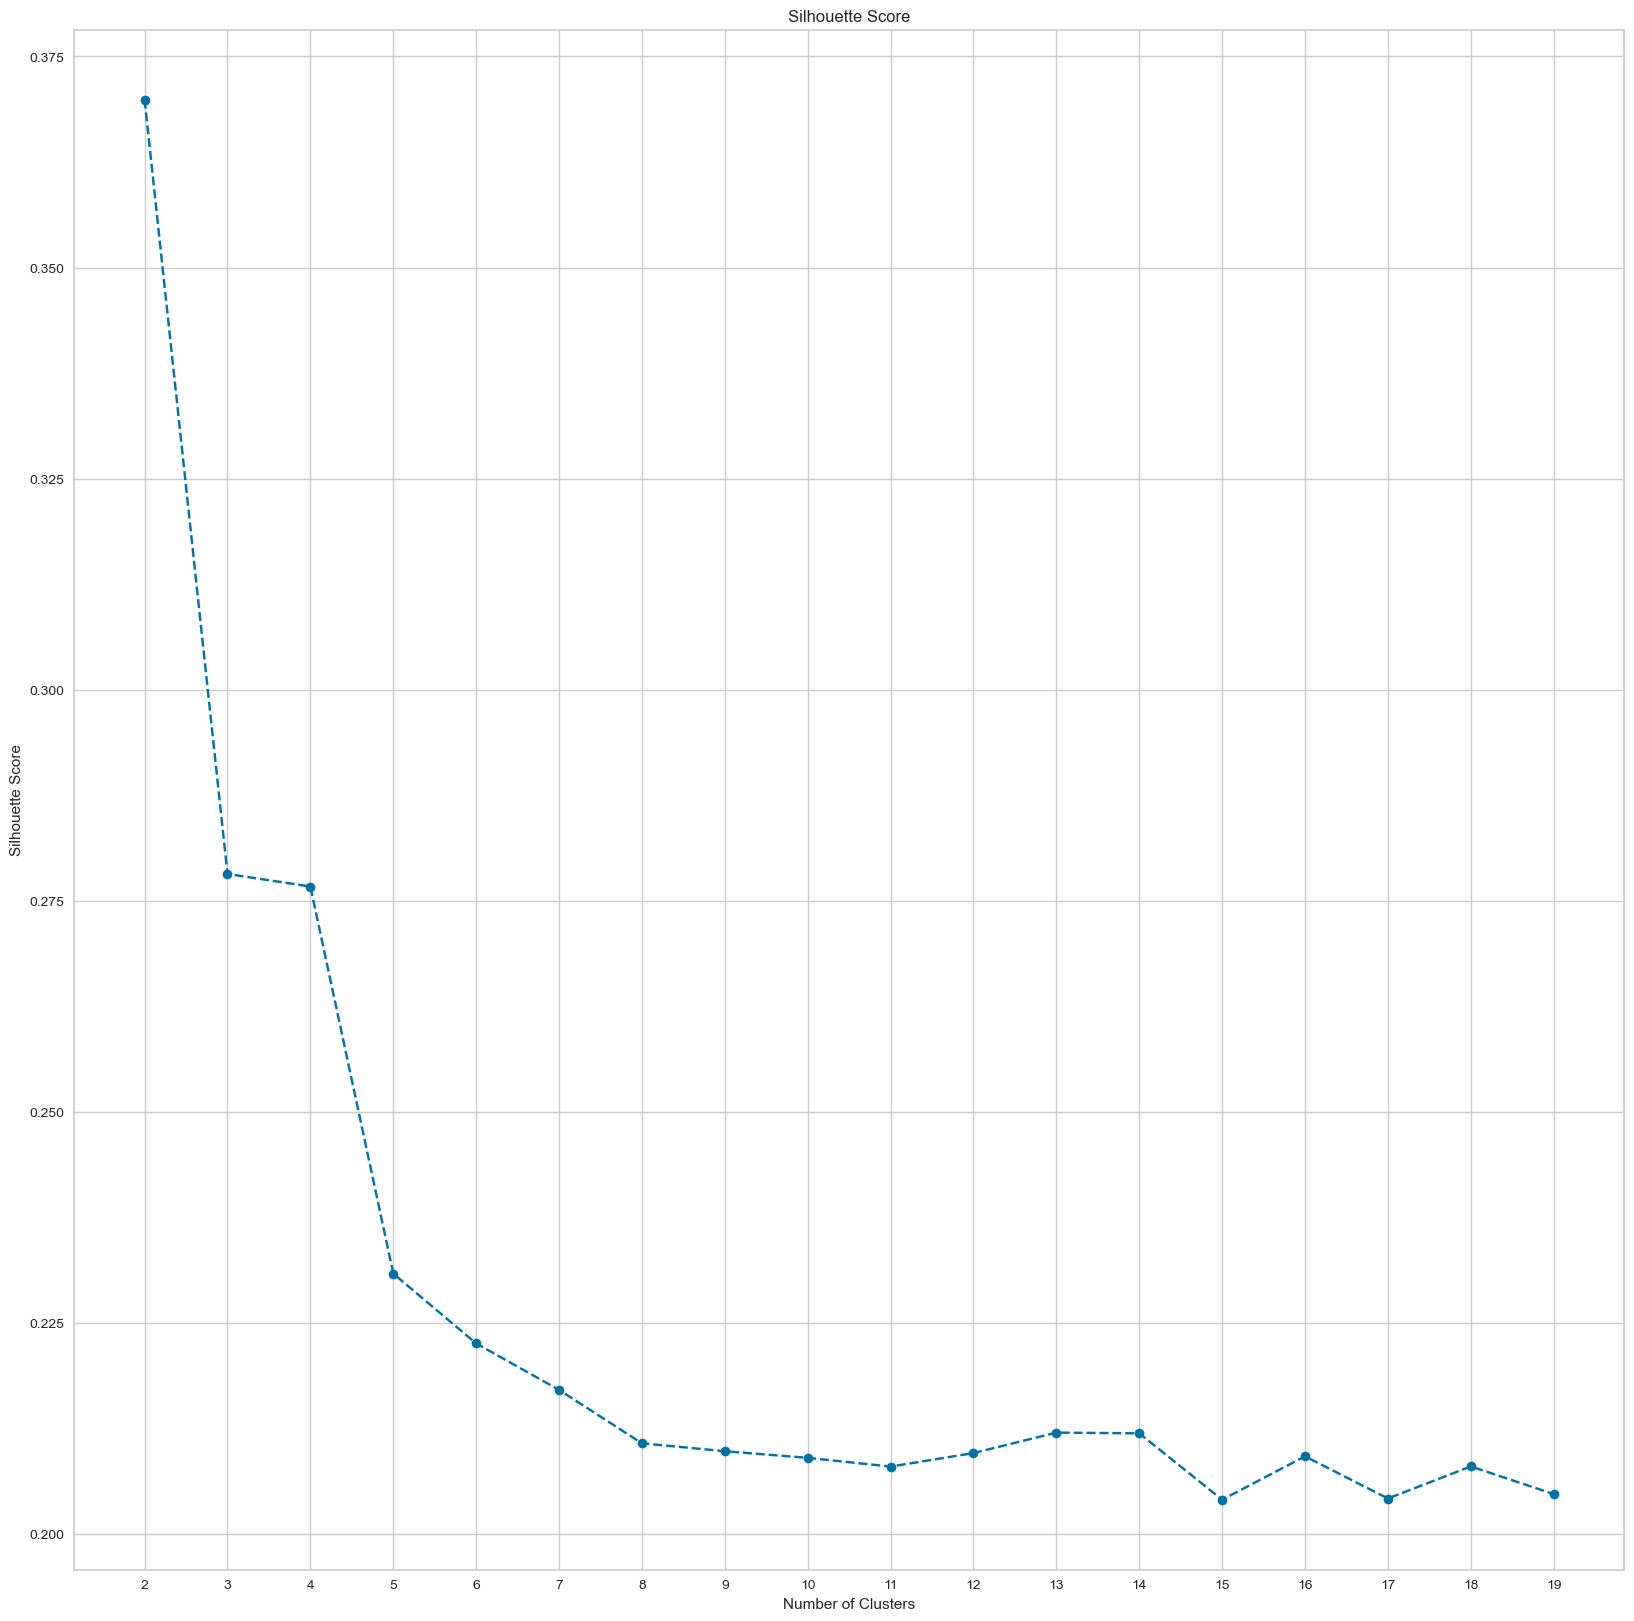

In [26]:
plt.figure(figsize=(20, 20))
plt.plot(*zip(*silhouette_avg_list), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 20))
plt.title('Silhouette Score')

plt.show()

Dapat dilihat dari plot bahwa nilai tertinggi silhouette score terletak di K=2. Untuk sekarang, mari gunakan DBSCAN untuk menentukan banyaknya cluster 

In [29]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=3,min_samples=4,metric='euclidean')

db.fit(df_fighter_scaled)

DBSCAN(eps=3, min_samples=4)

In [30]:
label=db.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


In [32]:
df_fighter_pca['cluster'] = label

df_fighter_pca.head()

,PC1,PC2,cluster
0,-1.534032,0.539254,0
1,1.184112,-0.268404,0
2,-0.178881,-0.335010,0
3,0.560332,0.277717,0
4,-1.460183,-0.231180,0


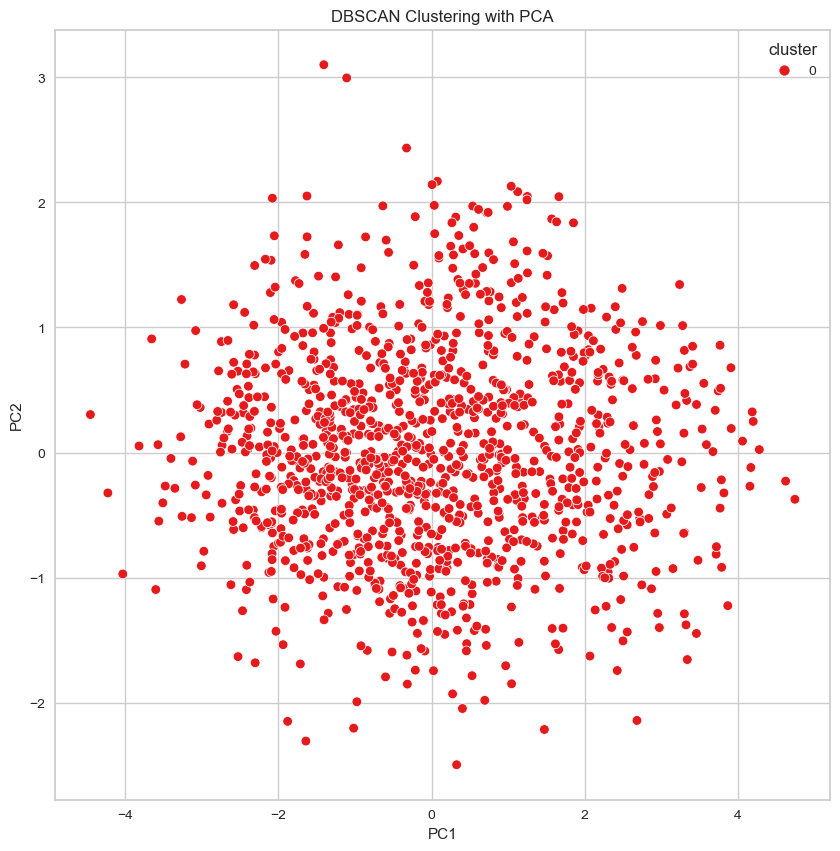

In [33]:
# Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_fighter_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("DBSCAN Clustering with PCA")
plt.show()

Dari hasil DBSCAN, dapat disimpulkan bahwa untuk subset fitur yang digunakan tidak cocok untuk dilakukan clustering karena untuk subset fitur ini hanya membentuk satu cluster yang densitasnya terpusat di tengah.